In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import calendar
import seaborn as sns
import sqlite3

In [2]:
# import dataset
cnx = sqlite3.connect("FPA_FOD_20170508.sqlite")
kaggle = pd.read_sql_query("SELECT * FROM Fires", cnx)

In [3]:
kaggle.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [4]:
# removing some columns
kaggle = kaggle.drop(['Shape', 'FPA_ID'], axis=1)

In [5]:
kaggle.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,2,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,3,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,4,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,5,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine


In [6]:
# converting the text categories to numbers using LabelEncoder
# https://stackoverflow.com/questions/34915813/convert-text-columns-into-numbers-in-sklearn
le = LabelEncoder()
kaggle['SOURCE_SYSTEM_TYPE'] = kaggle[['SOURCE_SYSTEM_TYPE']].apply(le.fit_transform)
kaggle[['SOURCE_SYSTEM']] = kaggle[['SOURCE_SYSTEM']].apply(le.fit_transform)
kaggle[['NWCG_REPORTING_AGENCY']] = kaggle[['NWCG_REPORTING_AGENCY']].apply(le.fit_transform)
kaggle[['NWCG_REPORTING_UNIT_ID']] = kaggle[['NWCG_REPORTING_UNIT_ID']].apply(le.fit_transform)
kaggle[['NWCG_REPORTING_UNIT_NAME']] = kaggle[['NWCG_REPORTING_UNIT_NAME']].apply(le.fit_transform)
kaggle[['SOURCE_REPORTING_UNIT_NAME']] = kaggle[['SOURCE_REPORTING_UNIT_NAME']].apply(le.fit_transform)
kaggle[['FIRE_SIZE_CLASS']] = kaggle[['FIRE_SIZE_CLASS']].apply(le.fit_transform)
kaggle[['OWNER_DESCR']] = kaggle[['OWNER_DESCR']].apply(le.fit_transform)
kaggle[['STATE']] = kaggle[['STATE']].apply(le.fit_transform)
kaggle[['FIPS_NAME']] = kaggle[['FIPS_NAME']].fillna(value="Unknown").apply(le.fit_transform)
kaggle[['COUNTY']] = kaggle[['COUNTY']].fillna(value="Unknown").apply(le.fit_transform)

In [7]:
kaggle.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,0,2,5,221,1168,0511,3206,1,...,0.10,0,40.036944,-121.005833,5.0,15,4,199,063,1213
1,2,2,0,2,5,174,453,0503,1257,13,...,0.25,0,38.933056,-120.404444,5.0,15,4,197,061,1210
2,3,3,0,2,5,174,453,0503,1257,27,...,0.10,0,38.984167,-120.735556,13.0,12,4,100,017,499
3,4,4,0,2,5,174,453,0503,1257,43,...,0.10,0,38.559167,-119.913333,5.0,15,4,151,003,28
4,5,5,0,2,5,174,453,0503,1257,44,...,0.10,0,38.559167,-119.933056,5.0,15,4,151,003,28


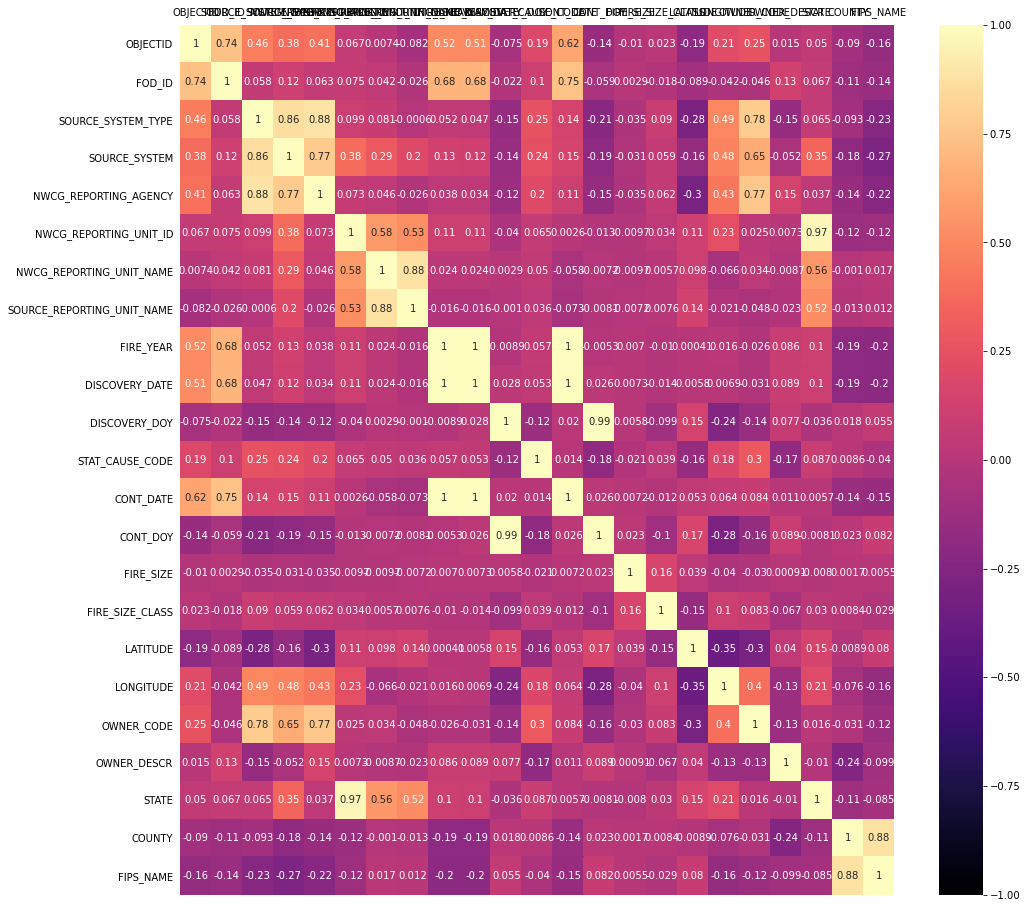

In [8]:
# Plots correlation matrix between features in Kaggle dataset
plt.figure(figsize=(16, 16))
ax = sns.heatmap(kaggle.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='magma')
ax.tick_params(axis='both', which='both', labelsize=10, labelbottom = False, left=False, bottom=False, top = False, labeltop=True)

In [9]:
kaggle = kaggle.drop(['LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'SOURCE_REPORTING_UNIT'], axis=1)

In [10]:
# kaggle['FIPS_CODE'] = pd.to_numeric(kaggle['FIPS_CODE'])

In [11]:
# kaggle['DISCOVERY_TIME'] = pd.to_numeric(kaggle['DISCOVERY_TIME'])

In [12]:
# kaggle['CONT_TIME'] = pd.to_numeric(kaggle['CONT_TIME'])

In [13]:
# convert the cause to numbers
unique = np.unique(kaggle['STAT_CAUSE_DESCR'])
desc2index = {v: k for k, v in enumerate(unique)}
index2desc = {k: v for k, v in enumerate(desc2index)}
kaggle['STAT_CAUSE_DESCR'] = kaggle['STAT_CAUSE_DESCR'].map(desc2index)

In [109]:
# starting PCA
targets = np.unique(kaggle['STAT_CAUSE_DESCR'])
X = kaggle.drop('STAT_CAUSE_DESCR', axis=1)
X = X.fillna(-1)
pca = PCA(n_components=2)
X.head()

,OBJECTID,FOD_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,0,0,0,10,28,28,2005,2453403.5,...,0.10,0,40.036944,-121.005833,5.0,3,2,63,63,39
1,2,2,0,0,0,7,11,11,2004,2453137.5,...,0.25,0,38.933056,-120.404444,5.0,3,2,61,61,38
2,3,3,0,0,0,7,11,11,2004,2453156.5,...,0.10,0,38.984167,-120.735556,13.0,2,2,17,17,19
3,4,4,0,0,0,7,11,11,2004,2453184.5,...,0.10,0,38.559167,-119.913333,5.0,3,2,3,3,0
4,5,5,0,0,0,7,11,11,2004,2453184.5,...,0.10,0,38.559167,-119.933056,5.0,3,2,3,3,0


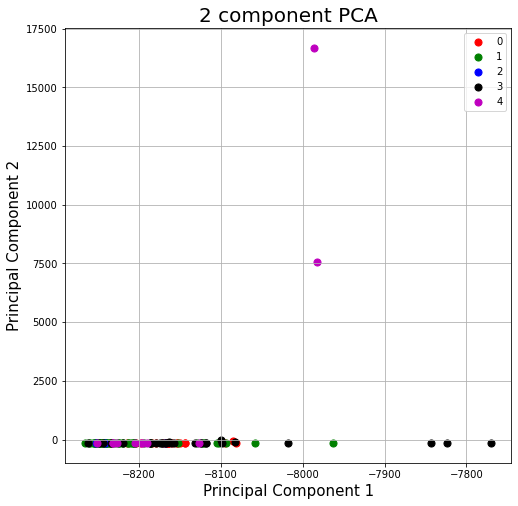

In [113]:
# PCA for looking at cause of fire
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, kaggle['STAT_CAUSE_DESCR']], axis = 1)
colors = ['r', 'g', 'b', 'k', 'm']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['STAT_CAUSE_DESCR'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# next step, regression for duration of fire